Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
Airline_data=pd.read_excel('Airlines+Data.xlsx')
Airline_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


### Data Exploration

In [3]:
Airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
Airline_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
# checking for null values
Airline_data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
#checking for duplicate values
Airline_data[Airline_data.duplicated()]

,Month,Passengers


### Data pre-processing

In [7]:
# Renaming the month column into Date
Airline_data.rename({'Month':'Date'},axis=1,inplace=True)

In [8]:
# Making the Date as DateTime index for the Dataframe
data= Airline_data.copy()
data.set_index('Date',inplace=True)
data.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [9]:
data.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [10]:
# Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data
Airline_data["Date"] = pd.to_datetime(Airline_data.Date,format="%b-%y")
Airline_data["month"] = Airline_data.Date.dt.strftime("%b") # month extraction
Airline_data["year"] = Airline_data.Date.dt.strftime("%Y") # year extraction
Airline_data.head()


,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


### Data Visualization

<AxesSubplot:xlabel='Date'>

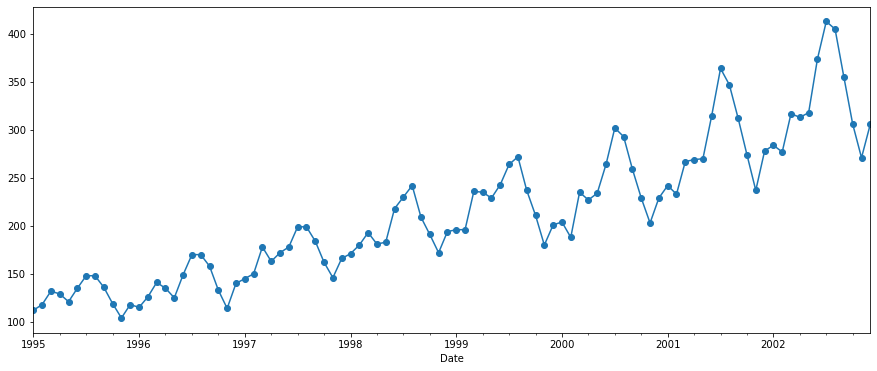

In [11]:
# line plot
data.Passengers.plot(figsize=(15, 6),marker='o')

We can see that there is an increasing Trend. So, Trend is not constant.Variance is also not constant.Hence the time serise is not stationary.

<AxesSubplot:xlabel='month', ylabel='Passengers'>

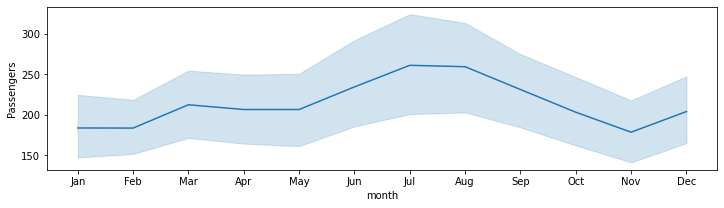

In [12]:
# Line Plot Using Passengers as Y axis and Month as X axis
plt.figure(figsize=(12,3))
sns.lineplot(x="month", y="Passengers", data=Airline_data)

<AxesSubplot:xlabel='month', ylabel='year'>

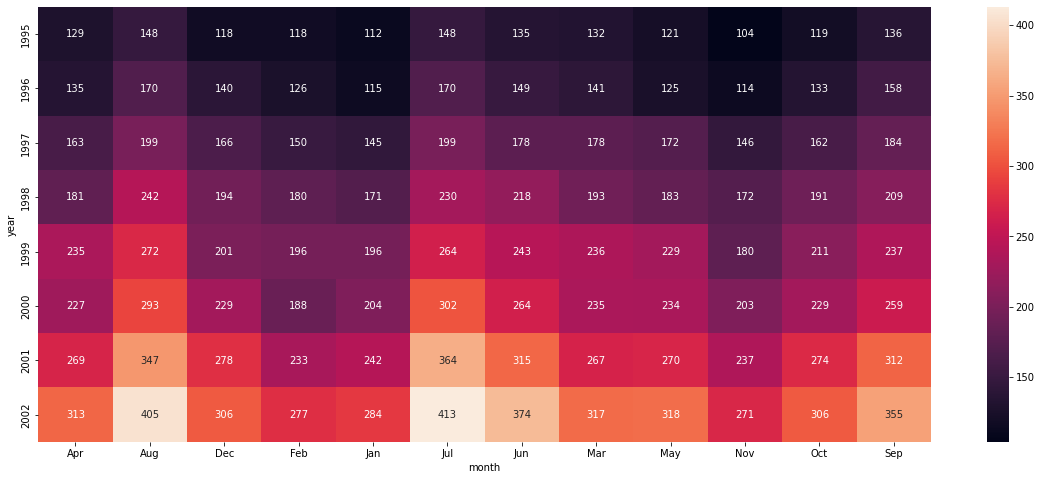

In [13]:
import seaborn as sns
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=Airline_data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") 


<AxesSubplot:xlabel='year', ylabel='Passengers'>

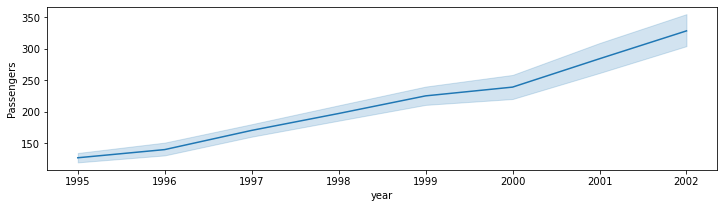

In [14]:
# line plot using Passengers as Y-axis and Year as x-axis
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airline_data)

As we show that july and august have higher pessengers the year and they are increasing every year.

<AxesSubplot:xlabel='year', ylabel='Passengers'>

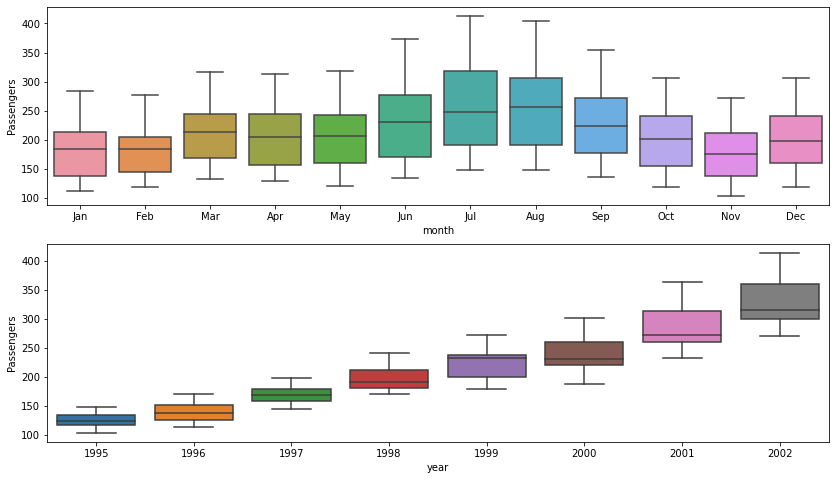

In [15]:
# Box Plot of Each Year by Monthly Intervals
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Airline_data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airline_data)

Simillar observation are obtained from box plot also.

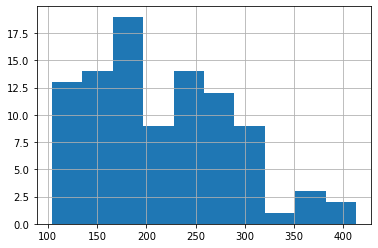

In [16]:
# Histogram
Airline_data.Passengers.hist()
plt.show()

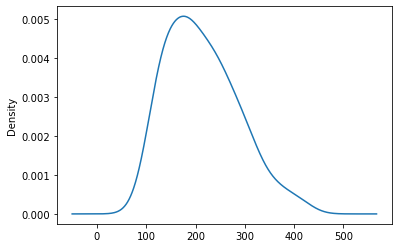

In [17]:
# create a density plot
Airline_data.Passengers.plot(kind='kde')
plt.show()

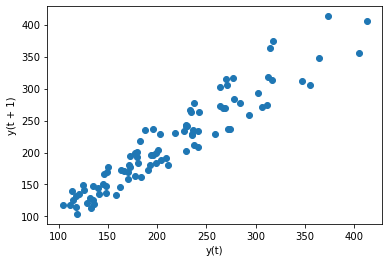

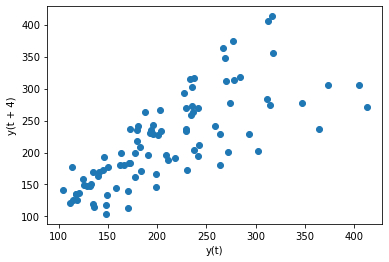

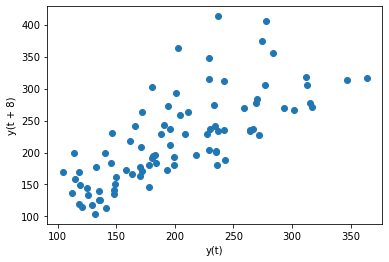

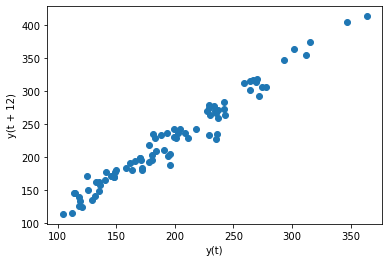

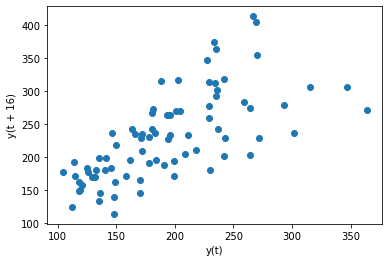

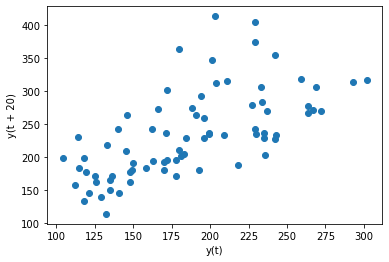

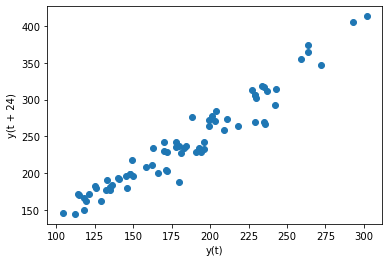

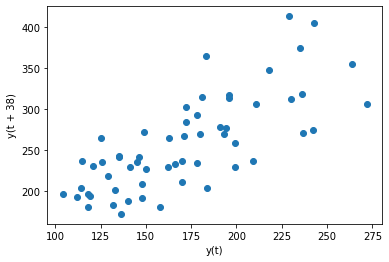

In [18]:
# create a scatter plot
from pandas.plotting import lag_plot
for i in [1,4, 8, 12, 16, 20, 24, 38]:
    #plt.figure(figsize=(12,8))
    lag_plot(Airline_data.Passengers, lag=i)
    plt.show()

### Moving Average

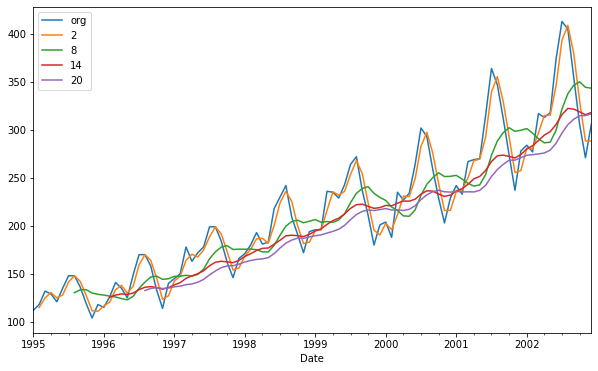

In [19]:

plt.figure(figsize=(10,6))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

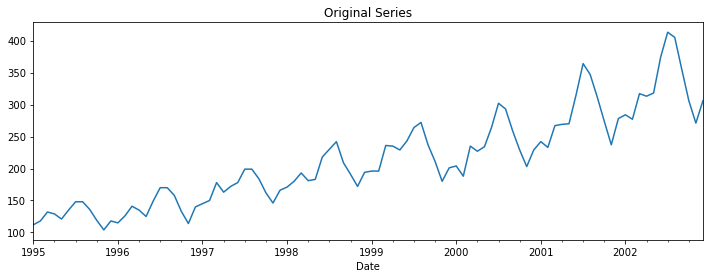

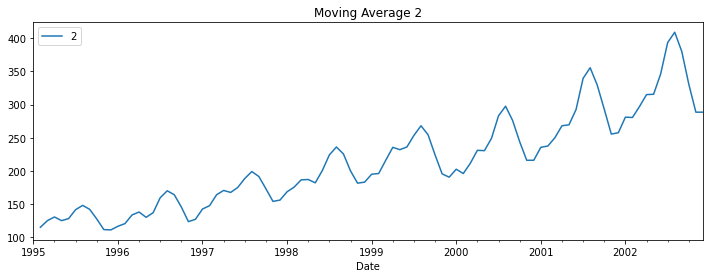

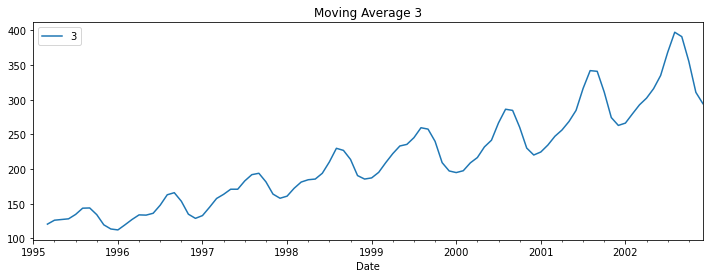

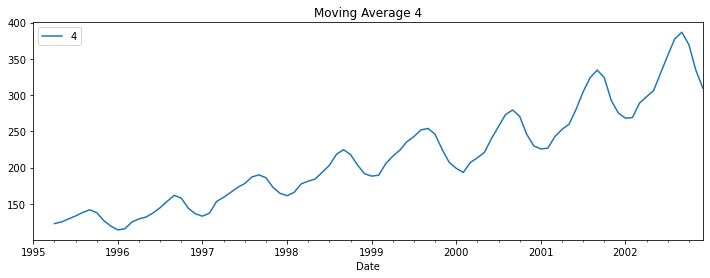

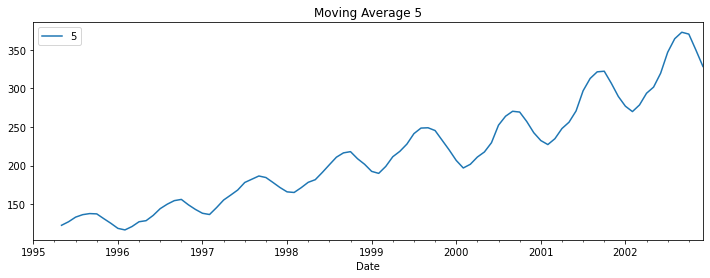

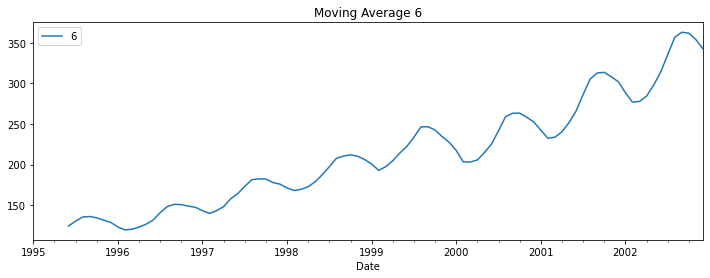

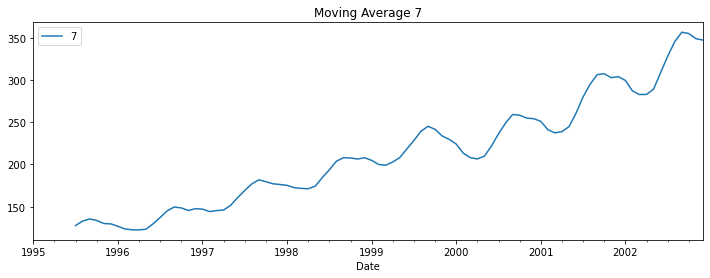

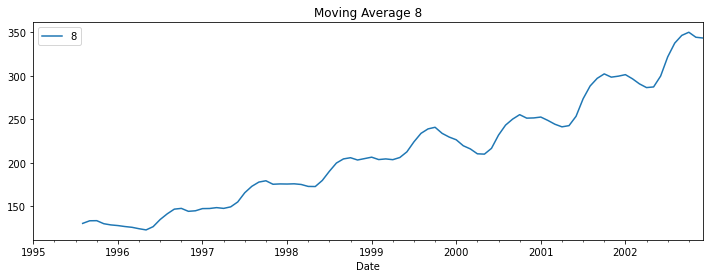

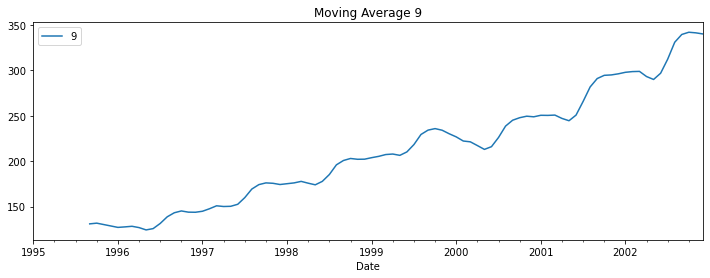

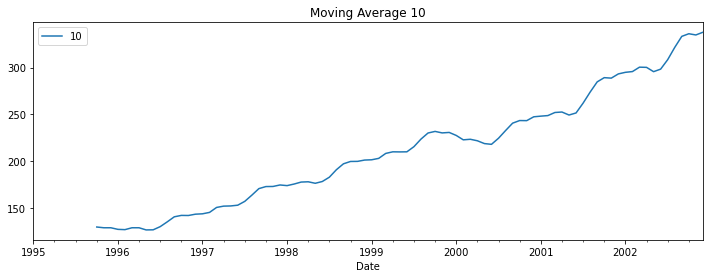

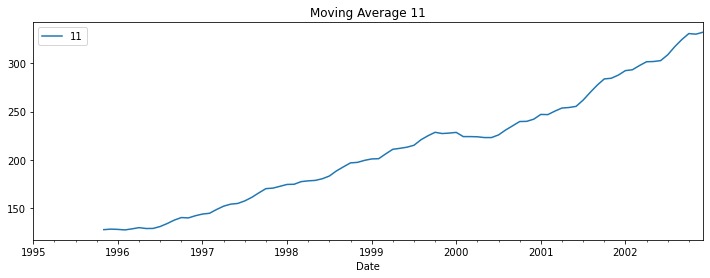

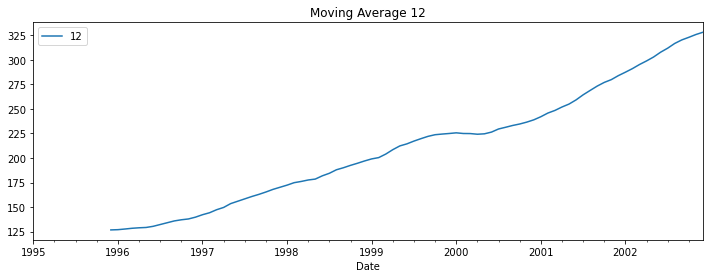

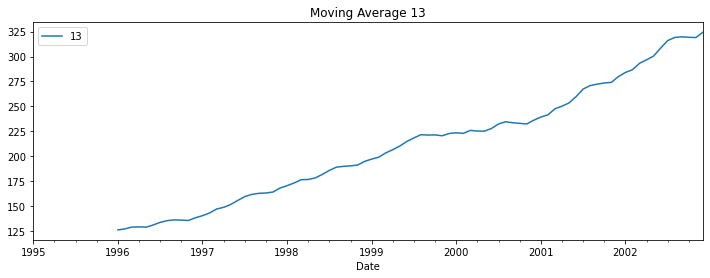

In [20]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,14):
    plt.figure(figsize=(12,4))
    data["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

### Time series decomposition plot

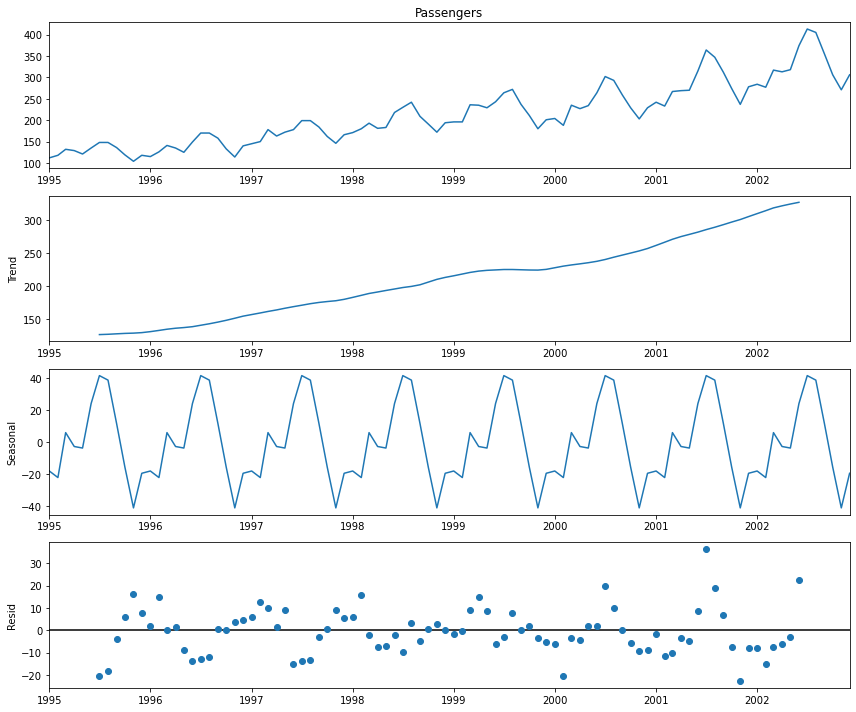

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

+ 1st graph is the original plot.
+ Second grah shows the trend of data.
+ Third graph shows seasonality in the data.
+ 4th graph shows the noise in data.

### ACF Plot

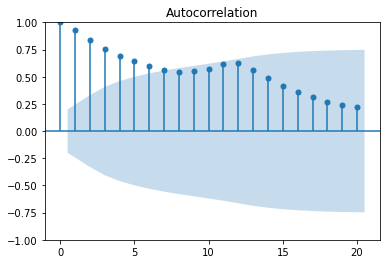

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots
acf =tsa_plots.plot_acf(data["Passengers"])    

### PACF Plot

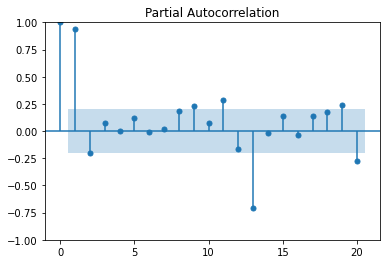

In [23]:
pacf =tsa_plots.plot_pacf(data["Passengers"])  

### Visualization of data

In [24]:
visual = Airline_data.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis =1 , inplace= True)
visual.head(10)


,index,Passengers,month,year,date,week,day_of_week
0,0,112,1,1995,1995-01-01,52,Sunday
1,1,118,2,1995,1995-02-01,5,Wednesday
2,2,132,3,1995,1995-03-01,9,Wednesday
3,3,129,4,1995,1995-04-01,13,Saturday
4,4,121,5,1995,1995-05-01,18,Monday
5,5,135,6,1995,1995-06-01,22,Thursday
6,6,148,7,1995,1995-07-01,26,Saturday
7,7,148,8,1995,1995-08-01,31,Tuesday
8,8,136,9,1995,1995-09-01,35,Friday
9,9,119,10,1995,1995-10-01,39,Sunday


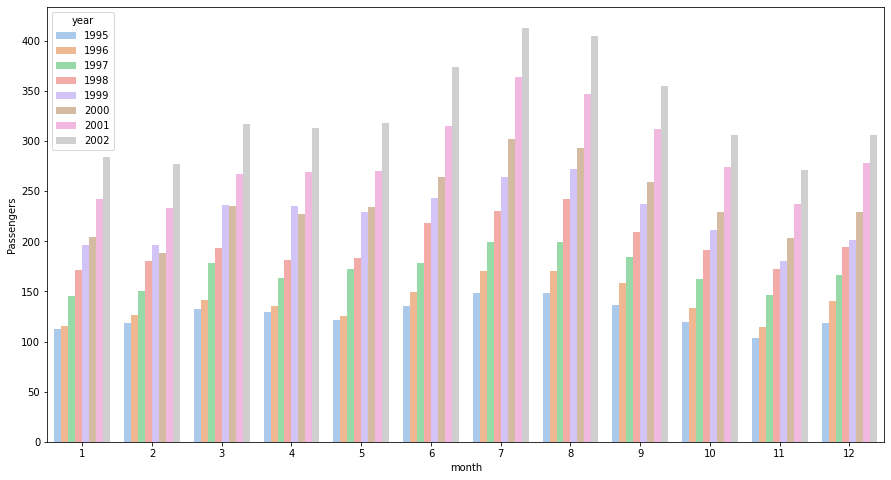

In [25]:
# visualization of Passengers year wise
visual = visual.sort_values(by='year')
plt.figure(figsize=(15,8))
sns.barplot(y="Passengers", x="month",hue="year",data=visual,palette="pastel")
plt.show()

Highest Passenger are Travel in july and august month.Passenger are increasing gradually from 1995 to 2002.

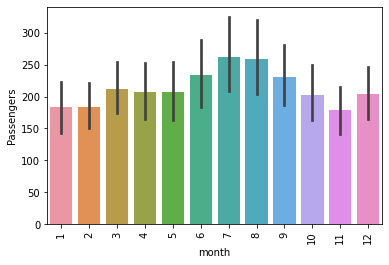

In [26]:
# visualization of Sales month wise
visual = visual.sort_values(by='month', ascending=False)
sns.barplot(y=visual["Passengers"], x=visual["month"])
plt.xticks(rotation = 90, fontsize = 10) 
plt.show()

As we show that july and august have higest pessengers.

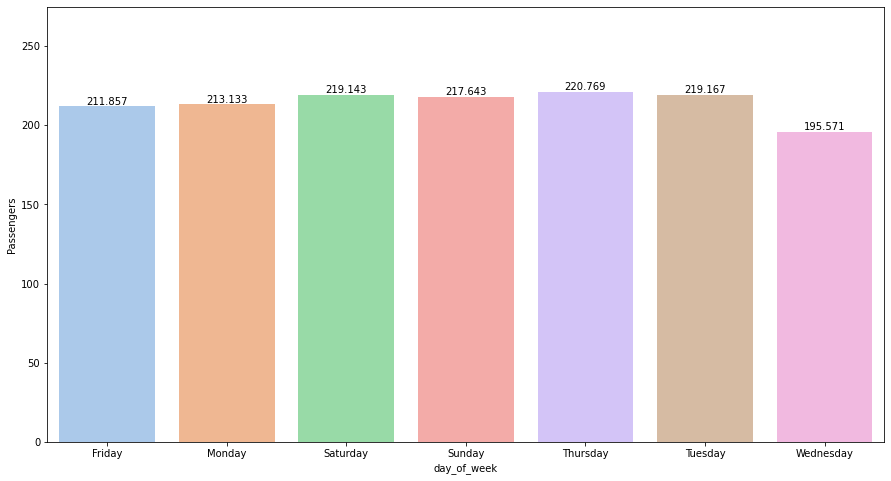

In [27]:
visual = visual.sort_values(by='day_of_week')
plt.figure(figsize=(15,8))
ax=sns.barplot(y="Passengers", x="day_of_week",data=visual,palette="pastel",errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)

As we show that most of passengers are travel on thursday.

### Time series decomposition plot

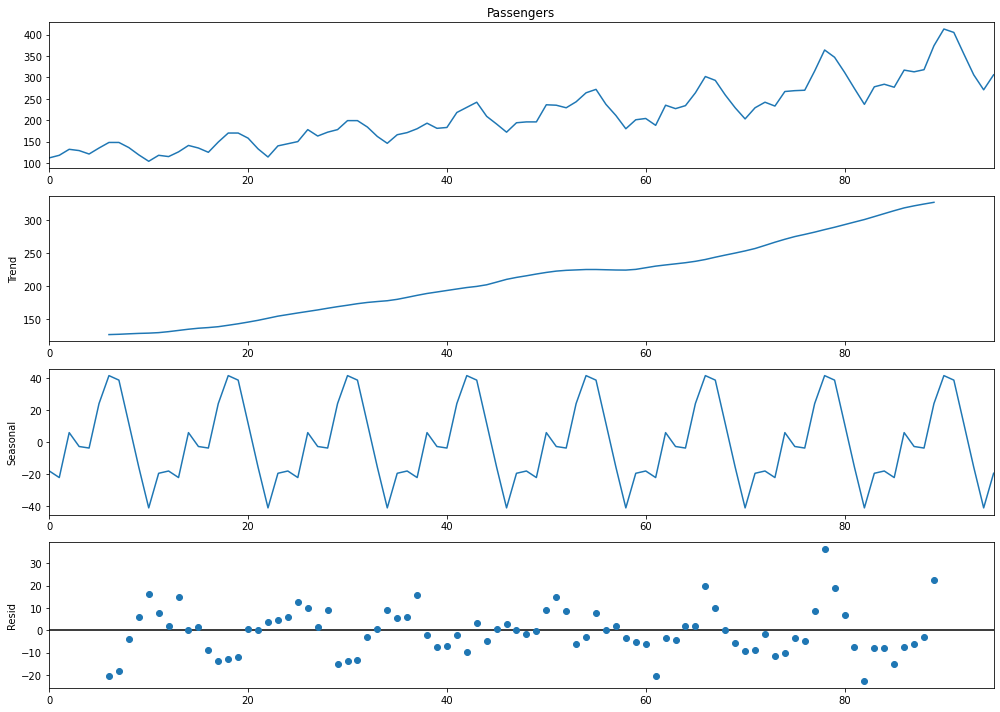

In [28]:
# Additive Seasonal Decomposition
decompose_ts_add = seasonal_decompose(Airline_data.Passengers,period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

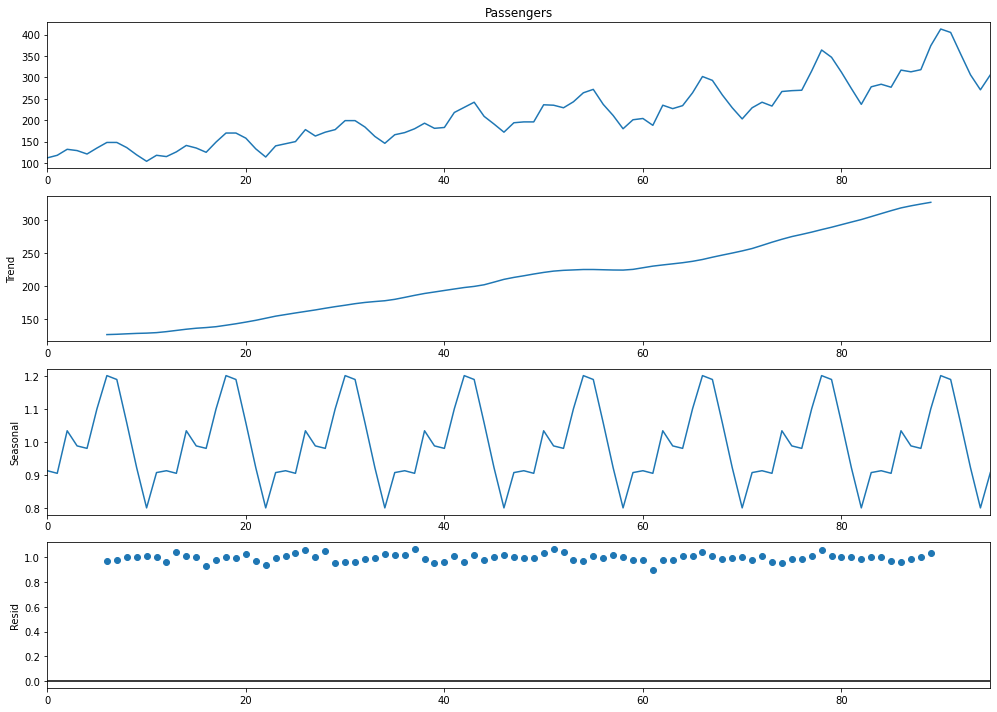

In [29]:
# Multiplicative Seasonal Decomposition
decompose_ts_add = seasonal_decompose(Airline_data.Passengers,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

### Splitting Train and Test Data

In [32]:
# Leaving Test Data with 2 Years of Time Series
train_data = data[:72]
test_data = data[72:]

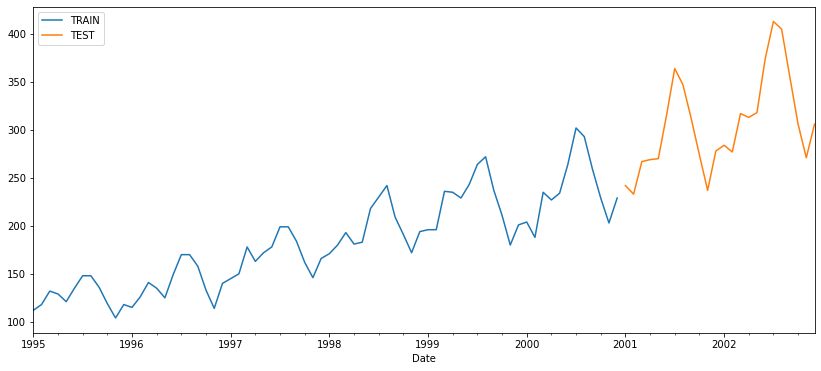

In [33]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(14,6));

### Evaluation Metric MAPE(Mean absolute percentage error)

In [34]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Exponential Methods

In [35]:
# Simple Exponential Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from math import sqrt
from sklearn.metrics import mean_squared_error
ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Passengers))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 23.382283350044727 
 Train Root Mean Squared Error = 19.031771730910982 
 Test Root Mean Squared Error = 91.11325402904403


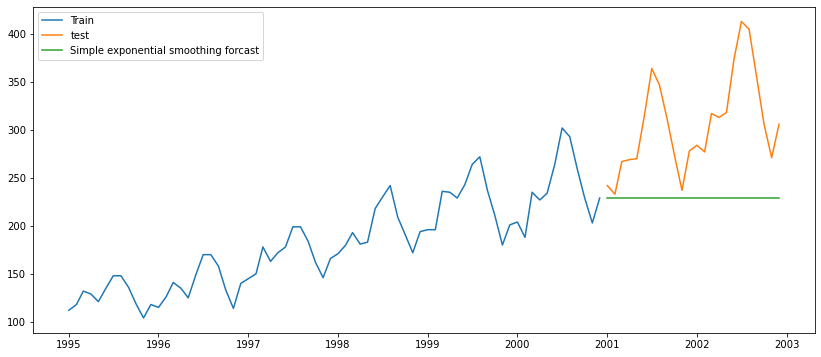

In [36]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


In [37]:
# Holt method (Double Exponential)
des_model  = Holt(train_data).fit(optimized=True)
test_pred_des = des_model.forecast(24)
train_pred_des = des_model.fittedvalues
test_rmse_des = sqrt(mean_squared_error(test_pred_des,test_data.Passengers))
train_rmse_des = sqrt(mean_squared_error(train_pred_des,train_data))
mape_des = MAPE(test_pred_des,test_data.Passengers)
print('Double Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_des),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_des),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_des))

Double Exponential Method Evaluation 
 Mean Absolute Percent Error = 17.148981696358685 
 Train Root Mean Squared Error = 18.96128999459111 
 Test Root Mean Squared Error = 71.63464300883933


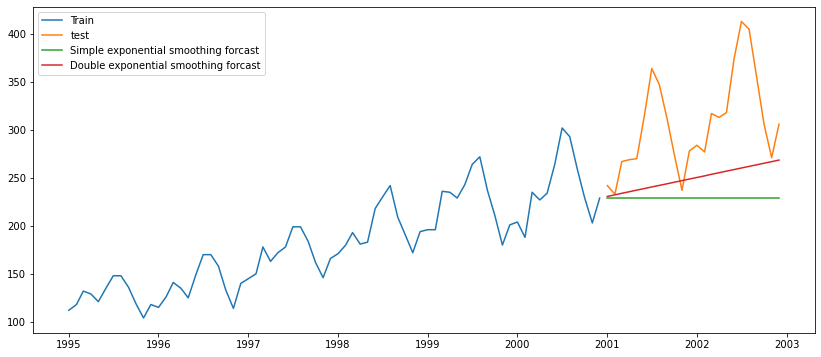

In [38]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [39]:
# Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

tes_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_tes = tes_add_model.forecast(24)
train_pred_ad_tes = tes_add_model.fittedvalues
test_rmse_ad_tes = sqrt(mean_squared_error(test_pred_ad_tes,test_data.Passengers))
train_rmse_ad_tes = sqrt(mean_squared_error(train_pred_ad_tes,train_data))
mape_ad_tes = MAPE(test_pred_ad_tes,test_data.Passengers)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_tes),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_tes),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_tes))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error = 12.084508619943344 
 Train Root Mean Squared Error = 7.75130351137479 
 Test Root Mean Squared Error = 47.5692832638379


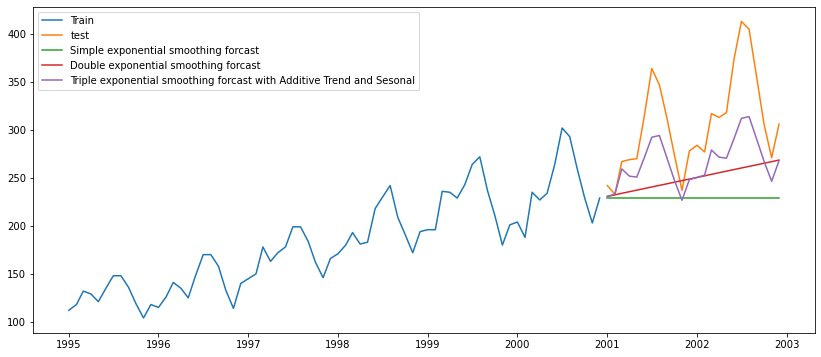

In [40]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

In [41]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

tes_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_tes = tes_mul_ad_model.forecast(24)
train_pred_mul_ad_tes = tes_mul_ad_model.fittedvalues
test_rmse_mul_ad_tes = sqrt(mean_squared_error(test_pred_mul_ad_tes,test_data.Passengers))
train_rmse_mul_ad_tes = sqrt(mean_squared_error(train_pred_mul_ad_tes,train_data))
mape_mul_ad_tes = MAPE(test_pred_mul_ad_tes,test_data.Passengers)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_ad_tes),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_tes),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_ad_tes))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error = 9.368354573562144 
 Train Root Mean Squared Error = 6.386634437793857 
 Test Root Mean Squared Error = 34.989365374325125


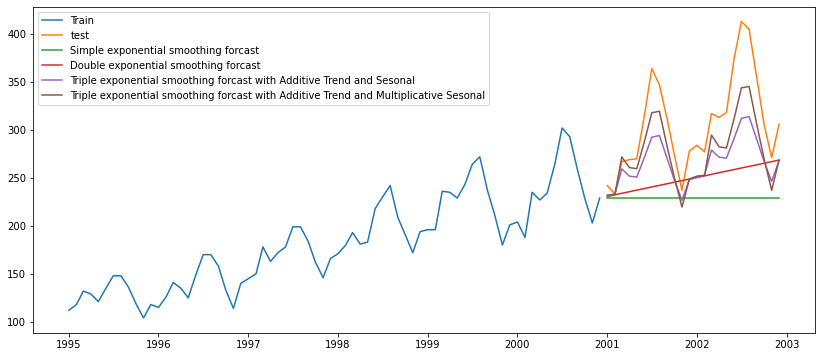

In [42]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

In [43]:
# Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential) 
tes_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_tes  = tes_ad_mul_model.forecast(24)
train_pred_ad_mul_tes  = tes_ad_mul_model.fittedvalues
test_rmse_ad_mul_tes  = sqrt(mean_squared_error(test_pred_ad_mul_tes ,test_data.Passengers))
train_rmse_ad_mul_tes  = sqrt(mean_squared_error(train_pred_ad_mul_tes ,train_data))
mape_ad_mul_tes  = MAPE(test_pred_ad_mul_tes,test_data.Passengers)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_tes ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_tes ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_tes ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 12.932828408981296 
 Train Root Mean Squared Error = 12.749205006763182 
 Test Root Mean Squared Error = 46.72864658311806


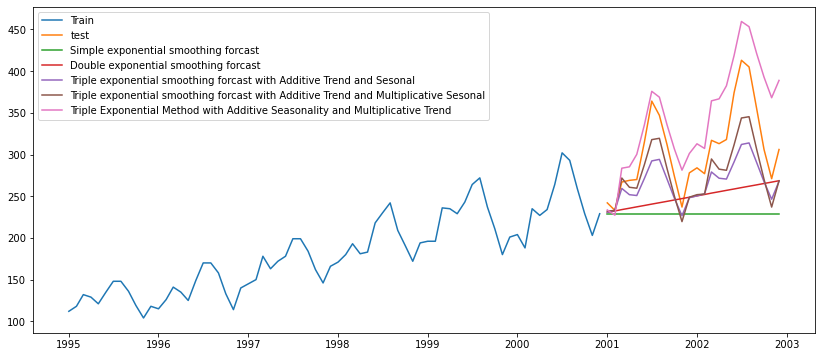

In [44]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_tes, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

In [235]:
# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)
tes_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_tes  = tes_mul_model.forecast(24)
train_pred_mul_tes  = tes_mul_model.fittedvalues
test_rmse_mul_tes  = sqrt(mean_squared_error(test_pred_mul_tes ,test_data.Passengers))
train_rmse_mul_tes  = sqrt(mean_squared_error(train_pred_mul_tes ,train_data))
mape_mul_tes  = MAPE(test_pred_mul_tes,test_data.Passengers)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_tes ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_tes ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_tes ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 6.034483884370218 
 Train Root Mean Squared Error = 6.3967514247667365 
 Test Root Mean Squared Error = 23.05679851513917


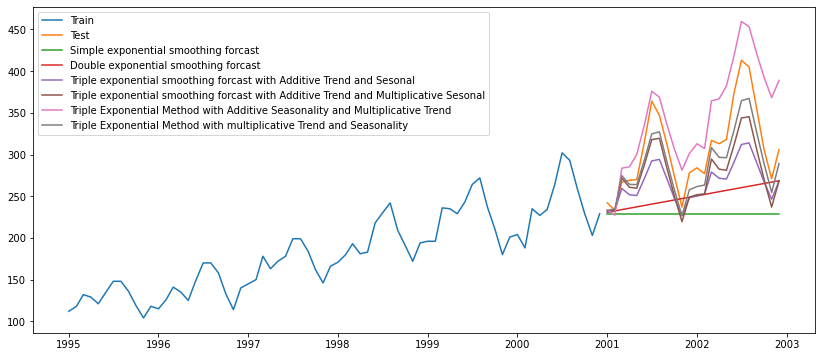

In [46]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_des, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_tes, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_tes, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_tes, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

In [47]:
# Comparing the results 
results = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul","Triple_Exp_mul"]),\
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_des,train_rmse_ad_tes,train_rmse_mul_ad_tes,train_rmse_ad_mul_tes,train_rmse_mul_tes]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_des,mape_ad_tes,mape_mul_ad_tes,mape_ad_mul_tes,mape_mul_tes]),\
        "Test_RMSE":pd.Series([test_rmse_ses,test_rmse_des,test_rmse_ad_tes,test_rmse_mul_ad_tes,test_rmse_ad_mul_tes,test_rmse_mul_tes])}
table_results=pd.DataFrame(results)
table_results.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_results

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE
0,Triple_Exp_mul,6.396751,6.034484,23.056799
1,Triple_Exp_mul_ad,6.386634,9.368355,34.989365
2,Triple_Exp_ad,7.751304,12.084509,47.569283
3,Triple_Exp_ad_mul,12.749205,12.932828,46.728647
4,Double_Exp,18.961290,17.148982,71.634643
5,Simple_Exp,19.031772,23.382283,91.113254


Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential) gives best result.

## Autoregressive Integrated Moving Averages (ARIMA)

#### Check stationarity using Dickey-Fuller Test

In [48]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    #Plot rolling statistics
    fig=plt.figure(figsize=(12,10))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

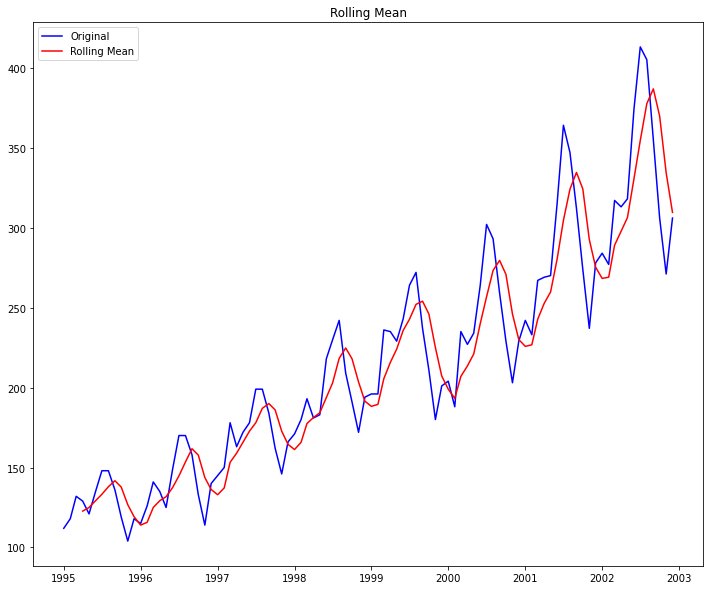

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [49]:
from statsmodels.tsa.stattools import adfuller
Passenger_info= pd.DataFrame()
Passenger_info['Passengers'] = data[['Passengers']]
test_stationarity(Passenger_info)

### Augmented Dicky Fuller Test

In [50]:

def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [51]:
adf_test(Passenger_info.Passengers)

Fail to reject the null hypothesis
Data is non-stationary


### Feature Scaling (Transformations)

#### Square Root Transform

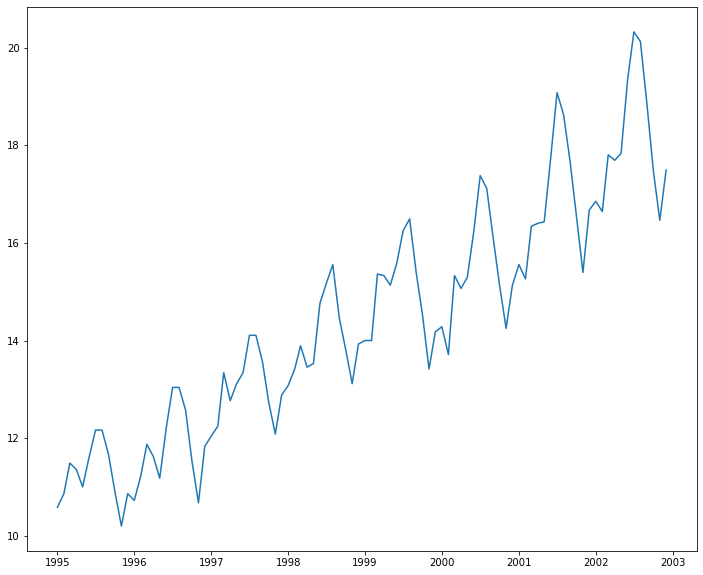

In [52]:
square_root= pd.DataFrame()
square_root = data[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.plot(square_root['Passengers'])


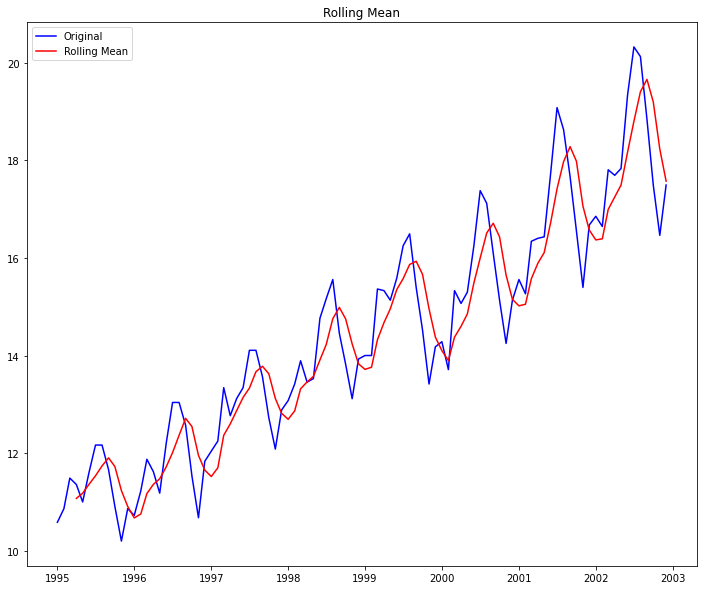

Results of Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [53]:
test_stationarity(square_root)

In [54]:
adf_test(square_root.Passengers)

Fail to reject the null hypothesis
Data is non-stationary


#### Log Transform

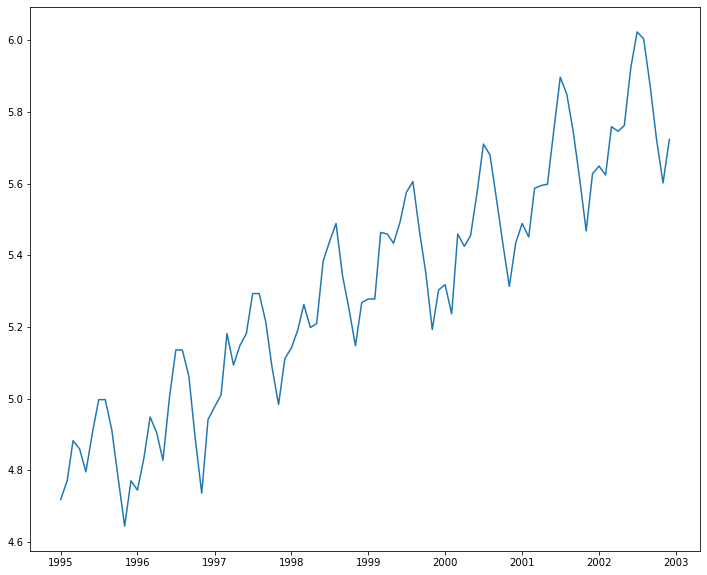

In [55]:
log = pd.DataFrame()
log =data[['Passengers']]
log['Passengers'] = np.log(log['Passengers'])

# line chart
fig=plt.figure(figsize=(12,10))
plt.plot(log['Passengers'])


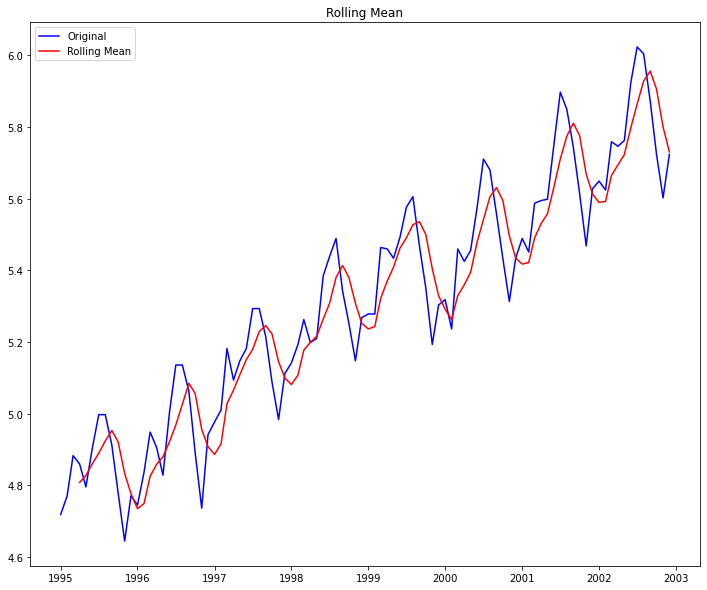

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [56]:
test_stationarity(log)

In [57]:
adf_test(log.Passengers)

Fail to reject the null hypothesis
Data is non-stationary


#### Differencing Transformation

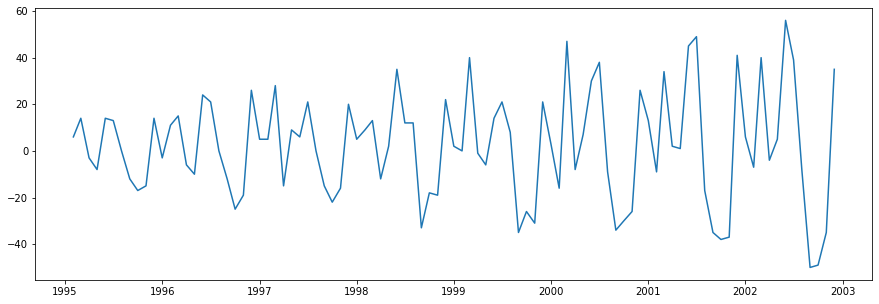

In [58]:
# Use Techniques Differencing 1st time
first_difference = pd.DataFrame()
first_difference = data[['Passengers']]
first_difference['Passengers'] = first_difference['Passengers']-first_difference['Passengers'].shift(1)

fig=plt.figure(figsize=(15,5))
plt.plot(first_difference)
plt.show()

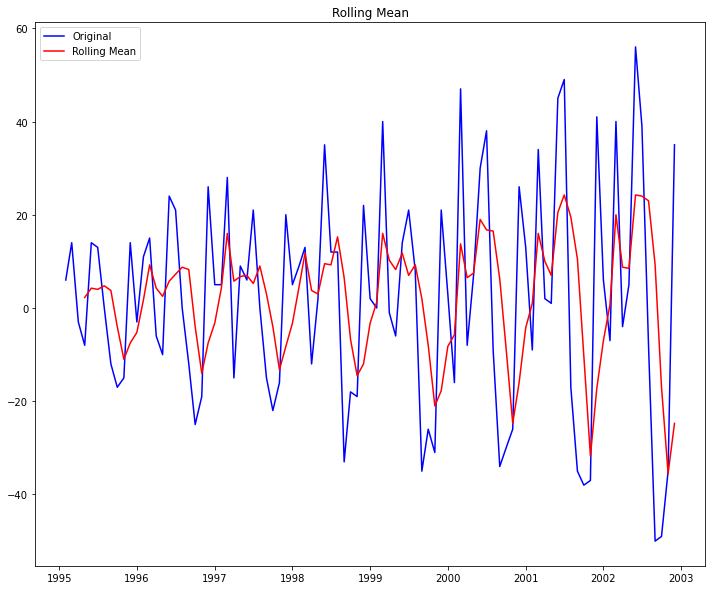

Results of Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [59]:
test_stationarity((first_difference).dropna())

In [60]:
adf_test(first_difference.Passengers)

Fail to reject the null hypothesis
Data is non-stationary


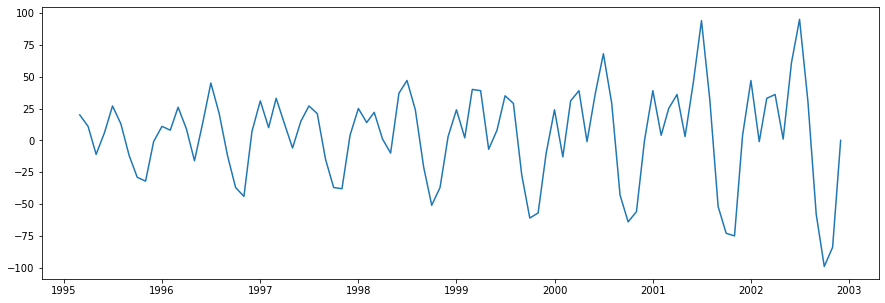

In [61]:
# Use Techniques Differencing 2nd time
second_difference = pd.DataFrame()
second_difference = data[['Passengers']]
second_difference['Passengers'] = second_difference['Passengers']-second_difference['Passengers'].shift(2)

fig=plt.figure(figsize=(15,5))
plt.plot(second_difference)
plt.show()

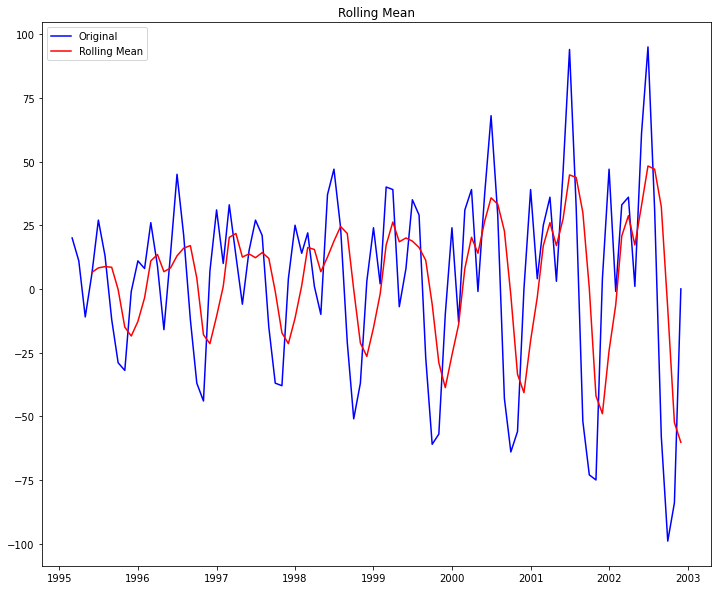

Results of Dickey Fuller Test:
Test Statistic                 -2.245916
p-value                         0.190004
#Lags Used                     11.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [62]:
test_stationarity((second_difference).dropna())

In [63]:
adf_test(second_difference.Passengers)

Fail to reject the null hypothesis
Data is non-stationary


#### Box Cox Transformation

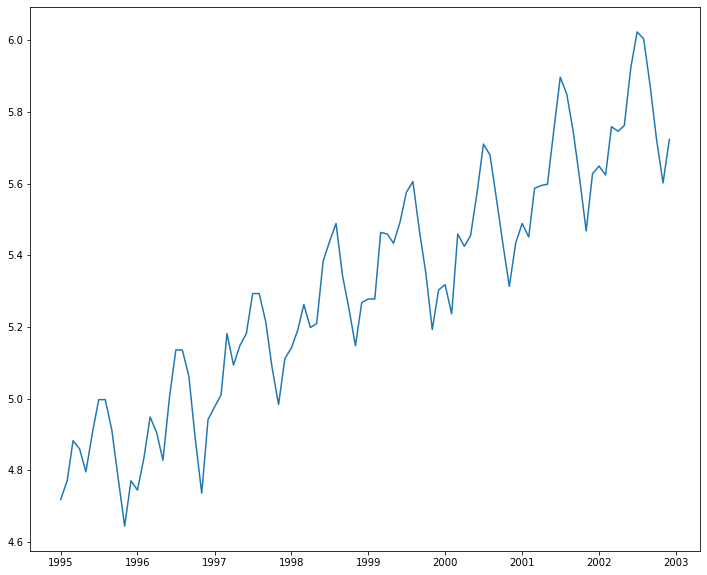

In [64]:
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(data['Passengers'], lmbda=0),data.index)
fig=plt.figure(figsize=(12,10))
plt.plot(data_boxcox)
plt.show()

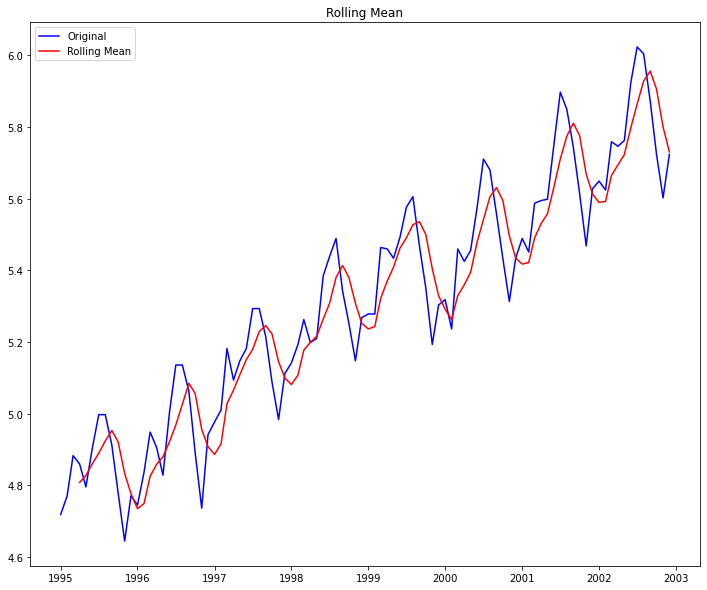

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [65]:
test_stationarity(data_boxcox)

In [66]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


####  Differencing of the Box-Cox Transformation

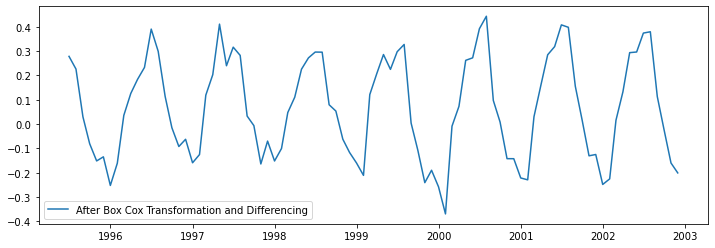

In [146]:
data_boxcox_diff = data_boxcox - data_boxcox.shift(6)
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

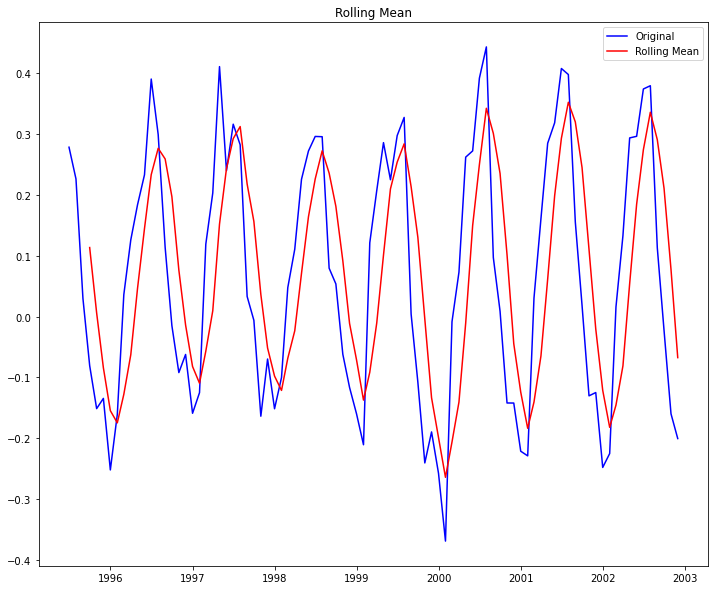

Results of Dickey Fuller Test:
Test Statistic                 -2.892158
p-value                         0.046268
#Lags Used                      7.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [147]:
test_stationarity(data_boxcox_diff)


In [148]:
adf_test(data_boxcox_diff.Passengers)

Reject the null hypothesis
Data is stationary


As we show that our Series is now stationary for AR Forecasting

### Forecasting by ARIMA Model

In [149]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


In [150]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [151]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [152]:
# train test split
from datetime import datetime,timedelta
train_dataset_end=datetime(2000,12,1)
test_dataset_end=datetime(2002,12,1)
train_data_boxcox_diff = data_boxcox_diff[:train_dataset_end]
test_data_boxcox_diff = data_boxcox_diff[train_dataset_end+timedelta(days=1):test_dataset_end]

In [153]:
# evaluate parameters
p_values = range(0, 8)
d_values = range(0, 2)
q_values = range(0, 5)
evaluate_models(train_data_boxcox_diff.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.238
ARIMA(0, 0, 1) RMSE=0.169
ARIMA(0, 0, 2) RMSE=0.127
ARIMA(0, 0, 4) RMSE=0.125
ARIMA(2, 0, 2) RMSE=0.102
ARIMA(3, 0, 3) RMSE=0.093
ARIMA(5, 0, 4) RMSE=0.081
ARIMA(6, 0, 0) RMSE=0.080
ARIMA(6, 0, 1) RMSE=0.067
ARIMA(6, 0, 2) RMSE=0.058
ARIMA(6, 0, 3) RMSE=0.057
ARIMA(6, 1, 0) RMSE=0.053
Best ARIMA(6, 1, 0) RMSE=0.053


### Building ARIMA model with best paramaeter

In [154]:
model = ARIMA(train_data_boxcox_diff, order=(6,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   66
Model:                 ARIMA(6, 1, 0)   Log Likelihood                  91.223
Date:                Thu, 15 Dec 2022   AIC                           -168.446
Time:                        16:16:48   BIC                           -153.225
Sample:                    07-01-1995   HQIC                          -162.440
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0169      0.072      0.236      0.814      -0.124       0.158
ar.L2          0.0216      0.061      0.352      0.725      -0.098       0.142
ar.L3         -0.0231      0.055     -0.418      0.676      -0.131       0.085
ar.L4         -0.0044      0.068     -0.065      0.948      -0.138       0.129
ar.L5         -0.0144      0.061     -0.237      0.813      -0.133       0.104
ar.L6         -0.9081      0.052    -17.307      0.000      -1.011      -0.805
sigma2         0.0030      0.001      5.490      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   5.26   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.02   Prob(JB):                         0.60
Heteroskedasticity (H):               1.17   Skew:                             0.25
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

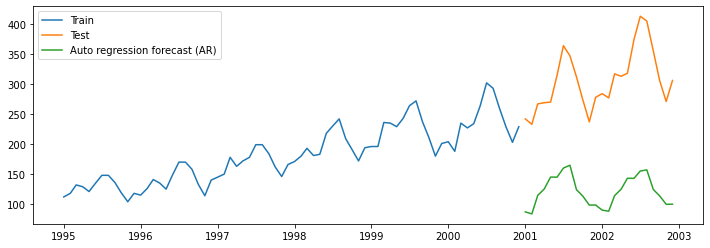

In [190]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar2= y_hat_ar.add(data_boxcox.Passengers[0])
y_hat_ar3 = np.exp(y_hat_ar2)

plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar3[test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

### Model Evaluation

In [192]:
# Root mean square error for ARIMA model
rmse_ARIMA = np.sqrt(mean_squared_error(test_data, y_hat_ar[test_data.index.min():])).round(2)
rmse_ARIMA


309.86

### MAPE (Mean Absolute Percent Error)

In [193]:
mape_arima = MAPE(y_hat_ar,test_data.Passengers)
mape_arima

99.98822393729684

### Analysing the Residuals

In [194]:
model_residual = model_fit.resid
model_residual.mean()

-0.0008242896686799555

In [195]:
# Residuals must be stationary
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


### No autocorrelation between residuals

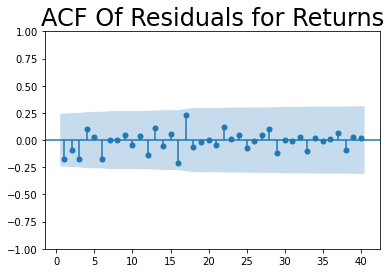

In [196]:
tsa_plots.plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

### Residuals must be random

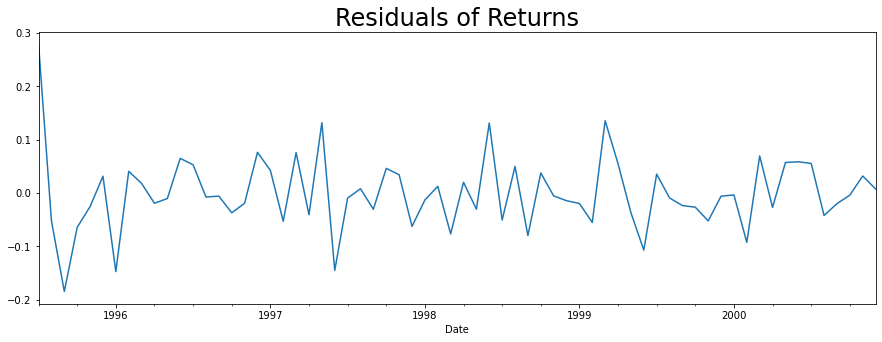

In [197]:
model_residual.plot(figsize=(15,5))
plt.title("Residuals of Returns", size=24)
plt.show()


## Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [216]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_s = SARIMAX(train_data_boxcox_diff, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit_s= model.fit()
model_fit_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   66
Model:                 ARIMA(6, 1, 0)   Log Likelihood                  91.223
Date:                Thu, 15 Dec 2022   AIC                           -168.446
Time:                        17:08:03   BIC                           -153.225
Sample:                    07-01-1995   HQIC                          -162.440
                         - 12-01-2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0169      0.072      0.236      0.814      -0.124       0.158
ar.L2          0.0216      0.061      0.352      0.725      -0.098       0.142
ar.L3         -0.0231      0.055     -0.418      0.676      -0.131       0.085
ar.L4         -0.0044      0.068     -0.065      0.948      -0.138       0.129
ar.L5         -0.0144      0.061     -0.237      0.813      -0.133       0.104
ar.L6         -0.9081      0.052    -17.307      0.000      -1.011      -0.805
sigma2         0.0030      0.001      5.490      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   5.26   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.02   Prob(JB):                         0.60
Heteroskedasticity (H):               1.17   Skew:                             0.25
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

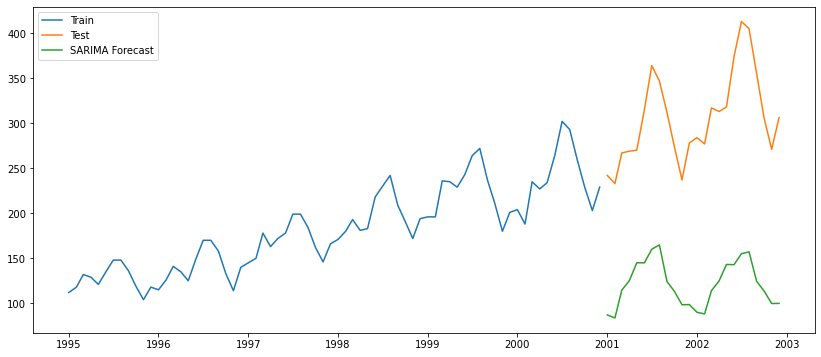

In [220]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima= model_fit_s.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima= y_hat_sarima.add(data_boxcox.Passengers[0])

y_hat_sarima= np.exp(y_hat_sarima)
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima[test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


### Model Evaluation

In [221]:
# Root mean square error for ARIMA model
rmse_SARIMA= np.sqrt(mean_squared_error(test_data,y_hat_sarima[test_data.index.min():])).round(2)
rmse_SARIMA

187.71

### MAPE (Mean Absolute Percent Error)

In [222]:
mape_sarima = MAPE(y_hat_sarima,test_data.Passengers)
mape_sarima


60.35446465287365

### Analysing the Residuals

In [223]:
model_residual_s = model_fit_s.resid
model_residual_s.mean()

-0.0008242896686799555

In [224]:
# Residuals must be stationary
adf_test(model_residual_s)


Reject the null hypothesis
Data is stationary


### No autocorrelation between residuals

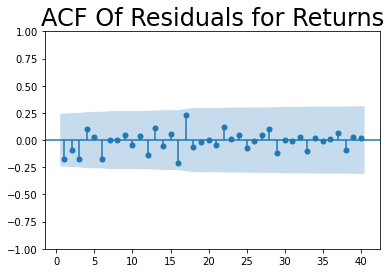

In [225]:
tsa_plots.plot_acf(model_residual_s, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

### Residuals must be random

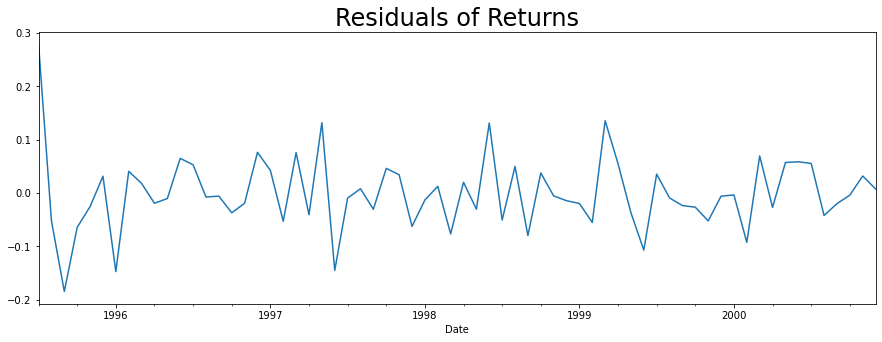

In [226]:
model_residual_s.plot(figsize=(15,5))
plt.title("Residuals of Returns", size=24)
plt.show()

### comparing model with differente Transformation Technique

In [227]:
#Compareing the results 

Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul",
                        "Triple_Exp_mul","ARIMA","SARIMA"]),\
        "MAPE(%)":pd.Series([mape_ses,mape_des,mape_ad_tes,mape_mul_ad_tes,mape_ad_mul_tes,mape_mul_tes,mape_arima,mape_sarima]),\
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_des,test_rmse_ad_tes,test_rmse_mul_ad_tes,test_rmse_ad_mul_tes,test_rmse_mul_tes,rmse_ARIMA,rmse_SARIMA])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

,Models,MAPE(%),RMSE_Values
0,Triple_Exp_mul,6.034484,23.056799
1,Triple_Exp_mul_ad,9.368355,34.989365
2,Triple_Exp_ad_mul,12.932828,46.728647
3,Triple_Exp_ad,12.084509,47.569283
4,Double_Exp,17.148982,71.634643
5,Simple_Exp,23.382283,91.113254
6,SARIMA,60.354465,187.710000
7,ARIMA,99.988224,309.860000


#### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential) did very well as compared to other methods and Models

### Retrain the model on the full data, and forecast the future

In [230]:
final_model  = ExponentialSmoothing(data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
forecast = final_model.predict(len(data),len(data)+24).rename('Forecast')
forecast

2003-01-01    315.018291
2003-02-01    311.707905
2003-03-01    361.240024
2003-04-01    352.909213
2003-05-01    354.363811
2003-06-01    403.881120
2003-07-01    450.858794
2003-08-01    445.620585
2003-09-01    395.601118
2003-10-01    347.199231
2003-11-01    304.936178
2003-12-01    348.177013
2004-01-01    357.241319
2004-02-01    353.487231
2004-03-01    409.658316
2004-04-01    400.210897
2004-05-01    401.860461
2004-06-01    458.014751
2004-07-01    511.289011
2004-08-01    505.348706
2004-09-01    448.624951
2004-10-01    393.735586
2004-11-01    345.807864
2004-12-01    394.844423
2005-01-01    405.123651
Freq: MS, Name: Forecast, dtype: float64

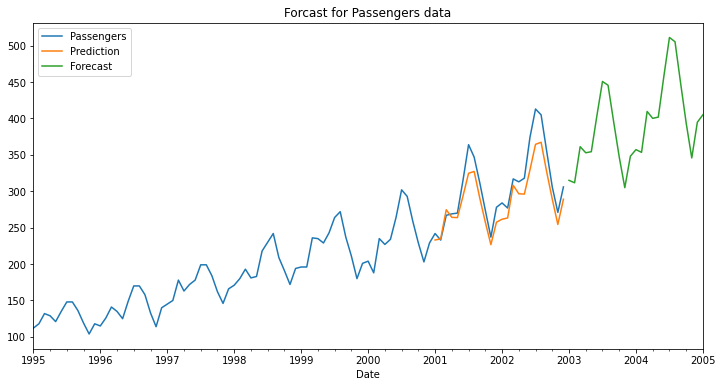

In [238]:
# Plot predictions against known values
title = 'Forcast for Passengers data'
ylabel='Passengers'
xlabel='Period' 

data['Passengers'].plot(legend=True,figsize=(12,6),title=title)
test_pred_mul_tes.plot(legend=True)
forecast.plot(legend=True)
plt.show()

## Conclusion

+ We can see that there is an increasing Trend. So, Trend is not constant.Variance is also not constant.Hence the time serise is not stationary
+ As we show that july and august have higher pessengers the year and they are increasing every year.
+ As we show that most of passengers are travel on thursday.
+ We can see that AR model has done reasonably good job but not better than Holt's method. We souldn't compare it with Holt's method. Because Holt's method captures seasonality
+ Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential) did very well as compared to other methods and Models